<a href="https://colab.research.google.com/github/dniboghgnis/New_additions/blob/master/Sales_data_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Sales data analysis    ###################################***

## EDA and Clustering
### The assumption is that the missing values do not affect the outcome of any of the analysis. Sales flag(sale/return) are all +ve.

## EDA

### Upload the sales_data.csv in the Google Colab data dir and run the codes.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('sales_data.csv')
df = df.applymap(lambda x: str(x).strip())
df['Sales Price'] = df['Sales Price'].replace("-",0)
df['MRP'] = df['MRP'].replace("-",0)
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df['Year'] = df['Sale Date'].dt.year
df['Month'] = df['Sale Date'].dt.month
df['Sales Price'] = df['Sales Price'].astype(float)
df['MRP'] = df['MRP'].astype(float)
df['Sales Qty'] = df['Sales Qty'].astype(int)
df['Total Sales'] = df['Sales Price'] * df['Sales Qty']
df['Discount']=df['Sales Price']-df['MRP']

In [75]:
df.dtypes

SKU Code               object
Brand Code             object
Category               object
Bill Number            object
Store Code             object
Sale Date      datetime64[ns]
Sale/Return            object
MRP                   float64
Sales Price           float64
Sales Qty               int64
Year                    int64
Month                   int64
Total Sales           float64
Discount              float64
dtype: object

## After data preprocessing this is what the data would look like. 

In [2]:
df.head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Year,Month,Total Sales,Discount
0,SKU0001,BRAND001,Cat01,BILL00001,Store 2,2017-06-23,Sale,92.00,92.00,1,2017,6,92.00,0.0
1,SKU0002,BRAND002,Cat01,BILL00002,Store 2,2017-01-03,Sale,68.00,68.00,1,2017,1,68.00,0.0
2,SKU0003,BRAND002,Cat01,BILL00003,Store 2,2017-01-03,Sale,80.67,80.67,1,2017,1,80.67,0.0
3,SKU0004,BRAND003,Cat01,BILL00004,Store 2,2017-01-03,Sale,113.33,113.33,1,2017,1,113.33,0.0
4,SKU0002,BRAND002,Cat01,BILL00005,Store 2,2017-01-03,Sale,68.00,68.00,1,2017,1,68.00,0.0


Some functions to get the sum of a particular column(numeric value like SP, MRP, Qty etc etc.) Necessary parameters passed. 

In [0]:
storeSales=df.groupby(['Store Code','Month'], as_index=False)['Total Sales'].sum()
brandSales=df.groupby(['Month', 'Brand Code'], as_index=False)['Total Sales'].sum()
categorySales=df.groupby(['Month','Category'], as_index=False)['Total Sales'].sum()

In [0]:
brandDiscount=df.groupby(['Month','Brand Code'],as_index=False)['Discount'].sum()
storeDiscount=df.groupby(['Month','Store Code'],as_index=False)['Discount'].sum()
categoryDiscount=df.groupby(['Month','Category'],as_index=False)['Discount'].sum()

In [0]:
brandQty=df.groupby(['Month','Brand Code'],as_index=False)['Sales Qty'].sum()
storeQty=df.groupby(['Month','Store Code'],as_index=False)['Sales Qty'].sum()
categoryQty=df.groupby(['Month','Category'],as_index=False)['Sales Qty'].sum()

Print the necessary head to see how the data is sliced. 

In [6]:
storeSales.head()

,Store Code,Month,Total Sales
0,Store 1,1,26243.71
1,Store 1,2,24046.44
2,Store 1,3,7879.42
3,Store 1,4,6530.75
4,Store 1,5,14728.71


In [7]:
brandSales.head()

,Month,Brand Code,Total Sales
0,1,BRAND001,11393.40
1,1,BRAND002,4406.71
2,1,BRAND003,10035.29
3,1,BRAND004,408.01
4,1,BRAND005,6549.25


In [8]:
categorySales.head()

,Month,Category,Total Sales
0,1,Cat01,79892.86
1,1,Cat02,1310.73
2,1,Cat03,983.35
3,1,Cat04,19125.64
4,1,Cat05,543.87


In [9]:
brandDiscount.head()

,Month,Brand Code,Discount
0,1,BRAND001,-49.32
1,1,BRAND002,42.93
2,1,BRAND003,792.55
3,1,BRAND004,0.00
4,1,BRAND005,-22.67


In [10]:
storeDiscount.head()

,Month,Store Code,Discount
0,1,Store 1,-531.44
1,1,Store 2,-563.70
2,1,Store 3,-325.54
3,1,Store 4,-520.65
4,1,Store 5,953.91


In [11]:
categoryDiscount.head()

,Month,Category,Discount
0,1,Cat01,259.45
1,1,Cat02,-2.34
2,1,Cat03,-10.84
3,1,Cat04,-1111.27
4,1,Cat05,-14.58


How long the dataset is?

In [12]:
brandQty.shape

(1563, 3)

In [13]:
storeQty.head()

,Month,Store Code,Sales Qty
0,1,Store 1,1344
1,1,Store 2,988
2,1,Store 3,1482
3,1,Store 4,1504
4,1,Store 5,1924


In [14]:
categoryQty.head()

,Month,Category,Sales Qty
0,1,Cat01,1268
1,1,Cat02,134
2,1,Cat03,77
3,1,Cat04,3308
4,1,Cat05,43


Print the column value on *index* and *values* axis(x-axis=index; y-axis=values). 

In [0]:
pivot1=storeSales.pivot(index='Month', columns='Store Code', values='Total Sales')
pivot2=brandSales.pivot(index='Month', columns='Brand Code', values='Total Sales')
pivot3=categorySales.pivot(index='Month', columns='Category', values='Total Sales')

In [0]:
pivot4=brandDiscount.pivot(index='Month', columns='Brand Code', values='Discount')
pivot5=storeDiscount.pivot(index='Month', columns='Store Code', values='Discount')
pivot6=categoryDiscount.pivot(index='Month', columns='Category', values='Discount')

In [0]:
pivot7=brandQty.pivot(index='Month', columns='Brand Code', values='Sales Qty')
pivot8=storeQty.pivot(index='Month', columns='Store Code', values='Sales Qty')
pivot9=categoryQty.pivot(index='Month', columns='Category', values='Sales Qty')

# Printing each graph and the insights,

## The following is a plot of the performance of the stores in a year. The y-axis gives the sales values of the store while x-axis gives the month. *Watch out for the yellow, purple, and the blue lines. Those are the crazy ones*. 

## What the sales data tells us?

## **pivot1**  

### Only the yellow one (store 5) does excellent business throughout the year. Store 5 (Mr. Wonderful) does excellent business at the start of the year and also the end of the year. In total there are 6 stores. 4 of them are kind of the same throughout the mid-year-ish time. Rest 2 are bad in sales. 

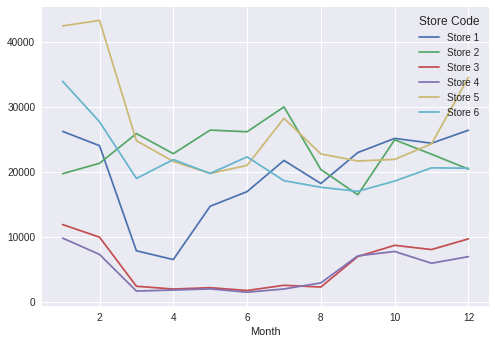

In [18]:
pivot1.plot()

`Scroll to the end in the small window after running the following command.`

**pivot2** 

### As is evident from the graph the brands have their own characteristic more or less. Unless we aren't looking at particular brand/s, this graph is more or less garbage due to the sheer number of lines(brands available). 

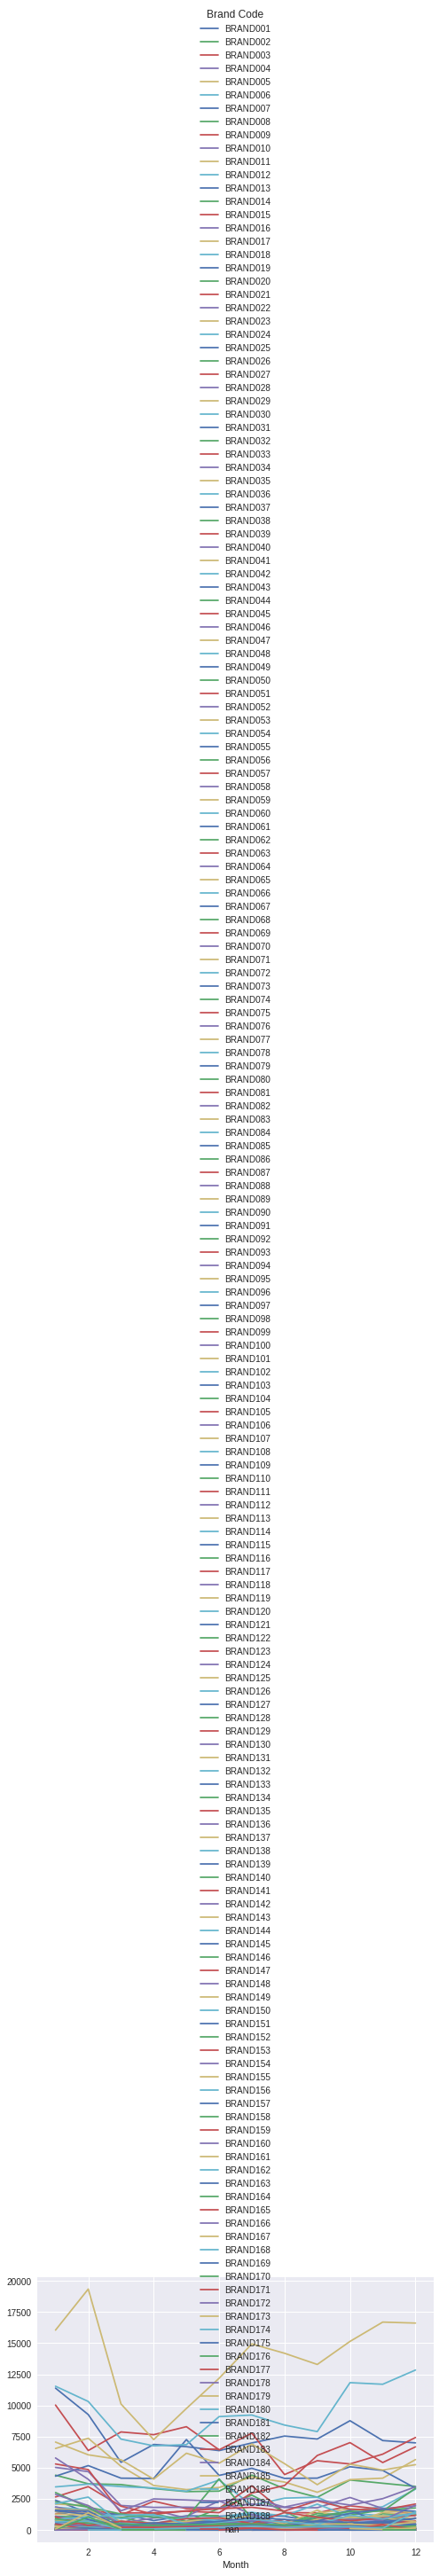

In [19]:
pivot2.plot()

# **pivot3** 

## Whatever these following three categories are, they are surrounded by a lot of revenue. The blue and the purple ones. And as with the previous cases, high sales in the start and end of the year.

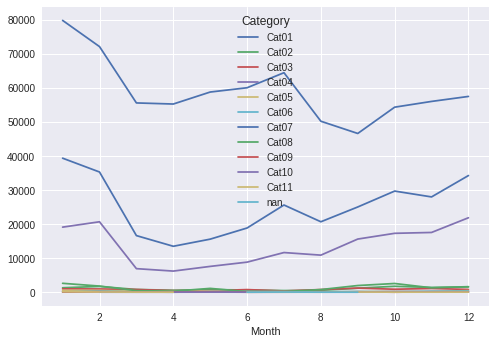

In [20]:
pivot3.plot()

# What does the discount data tells us?

**pivot4** 

### There are two outstanding brands but one of is probably nan. Still, one brand is either having very bad days or incredibly good ones. Rest are doing average business

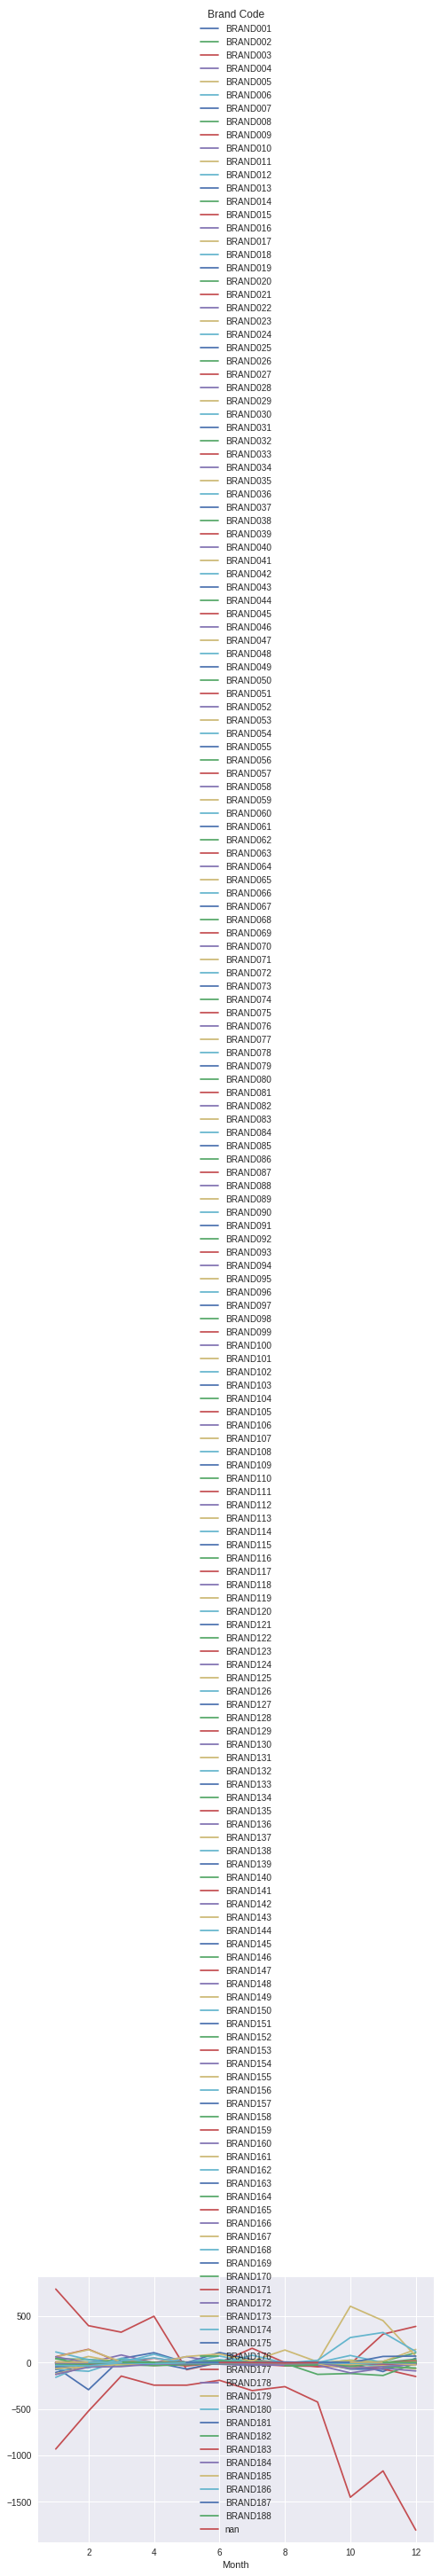

In [21]:
pivot4.plot()

**pivot5** 

### Here comes Mr. Wonderful(store 5). Again. He has done the most business throughout the year after charging exorbitant money from the customers. While others have followed a path of offering discounts in the new years time, Mr. Wonderful chose different. He chose to **increase** the price during that time. And looking at **pivot1** we can only say that he has certainly earned a lot of fame in the money world. 

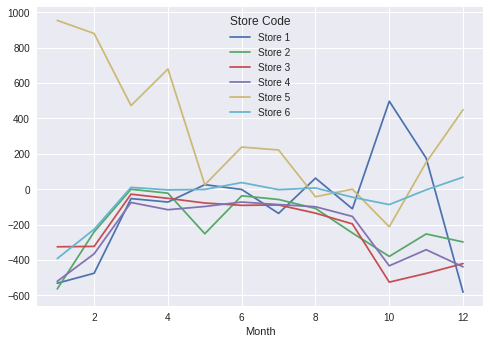

In [22]:
pivot5.plot()

### **pivot6** Looks like the purple one is  the only category offering significant discounts to people. People seem to buy a lot of the purple category item, as evident from **pivot3**. The blue seem to always charge more than they should.

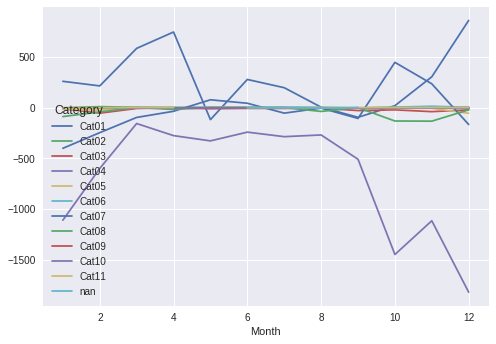

In [23]:
pivot6.plot()

### **pivot7** Except a few brands that are too costly throughout the year, more of the brands sell their product at more or less the same price as MRP.

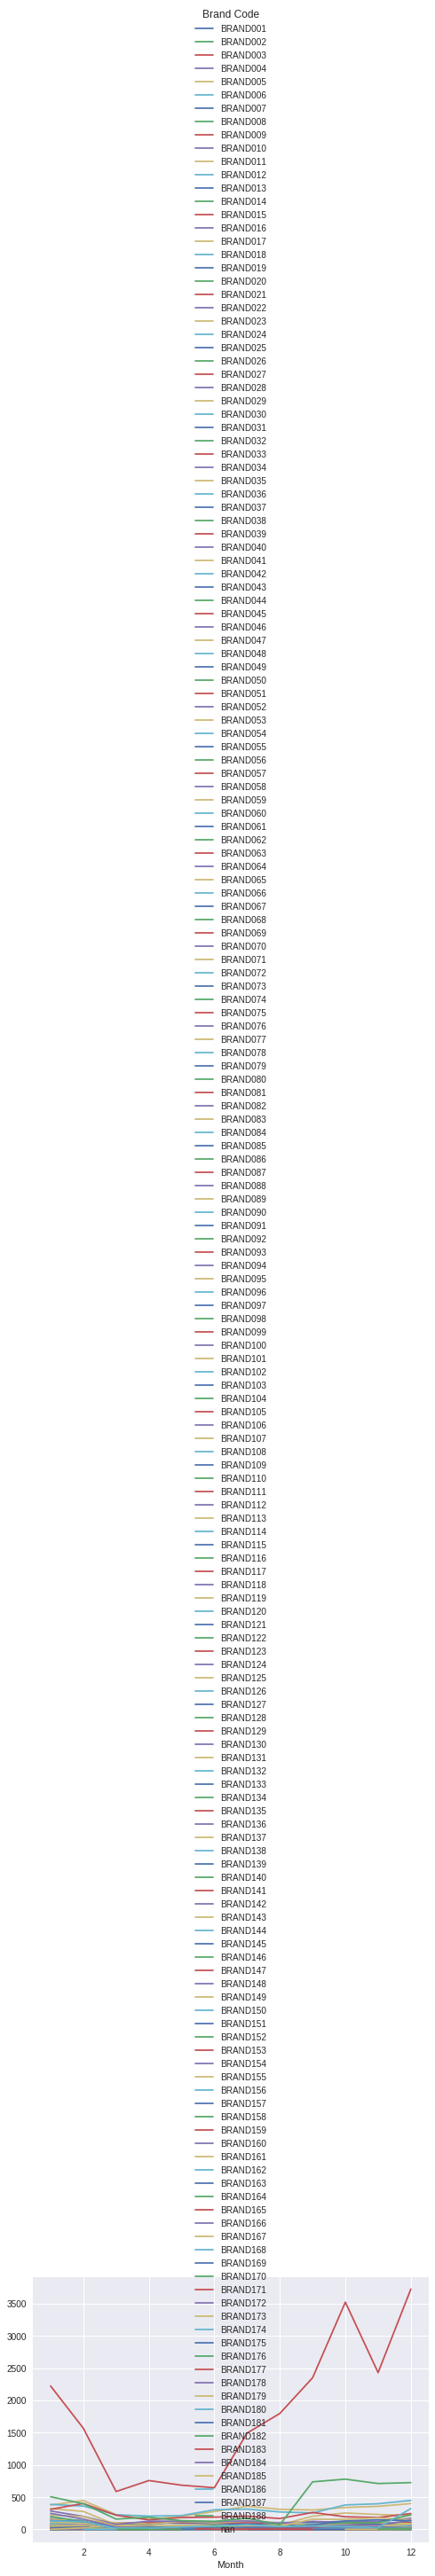

In [24]:
pivot7.plot()

### **pivot8** As usual Mr. Wonderful steals the thunder in the sales by qty as well, selling the most number of items throughout the year(more or less). A few others also managed to do good business.

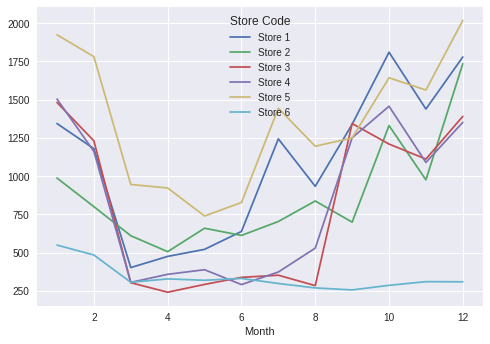

In [25]:
pivot8.plot()

### **pivot9** The purple category sells the most qty. The purple category items are incredibly cheap, the make good sales numbers, and people buy them a lot. Although the blue ones are giving negative discounts, they still manage to sell a large chunk of their products.

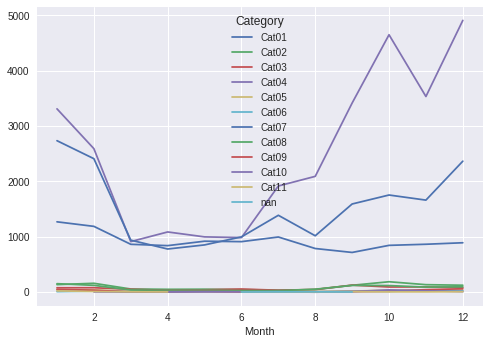

In [26]:
pivot9.plot()

# Let us see what is driving the yellow store's figures. 

In [0]:
bestBrands=df.groupby(['Brand Code','Store Code'],as_index=False)['Total Sales'].sum()
bestCategories=df.groupby(['Category','Store Code'],as_index=False)['Total Sales'].sum()
bestBrands.head()

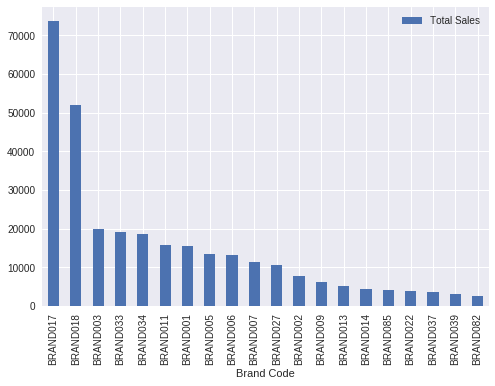

In [32]:
bestBrands1=bestBrands[bestBrands['Store Code']=='Store 5']
# bestBrands1.head()
bestBrands1.sort_values(by='Total Sales',ascending=False)[:20].set_index('Brand Code').plot.bar()

### As evident the two brands are the significant contributors. But there is a noticeable presence of the other brands as well. Lets look at the categorical values

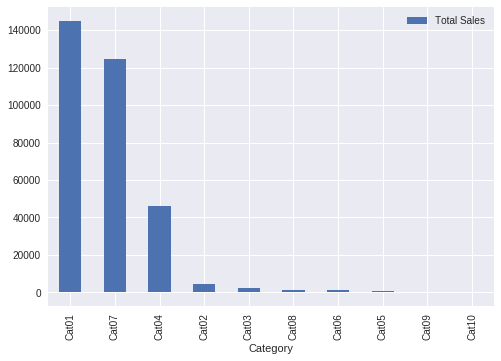

In [35]:
bestCategories1=bestCategories[bestCategories['Store Code']=='Store 5']
bestCategories1.sort_values(by='Total Sales',ascending=False)[:20].set_index('Category').plot.bar()

### There are only two categories, cat1 and cat7 who have completely outclassed the others. These are actually the blue lines in the category graphs[ **pivot3** ] [ **pivot6** ] [ **pivot9** ]. And these three lines(two blues, and Mr. Wonderful) complete the list of the three crazy ones I told to watch for at the beginning. 

## Let us see what brands are hidden in those two categories,

In [45]:
category1=df[df['Store Code']=='Store 5']
category1=category1[category1['Category']=='Cat01']
category1.head()

,SKU Code,Brand Code,Category,Bill Number,Store Code,Sale Date,Sale/Return,MRP,Sales Price,Sales Qty,Year,Month,Total Sales,Discount
3936,SKU0323,BRAND001,Cat01,BILL02596,Store 5,2017-09-16,Sale,56.67,56.67,1,2017,9,56.67,0.0
3945,SKU0323,BRAND001,Cat01,BILL02601,Store 5,2017-09-16,Sale,56.67,56.67,1,2017,9,56.67,0.0
3986,SKU0676,BRAND001,Cat01,BILL02615,Store 5,2017-09-17,Sale,78.00,78.00,1,2017,9,78.00,0.0
3991,SKU0758,BRAND006,Cat01,BILL02618,Store 5,2017-09-17,Sale,109.33,109.33,1,2017,9,109.33,0.0
3999,SKU0167,BRAND005,Cat01,BILL02620,Store 5,2017-09-17,Sale,32.00,32.00,1,2017,9,32.00,0.0


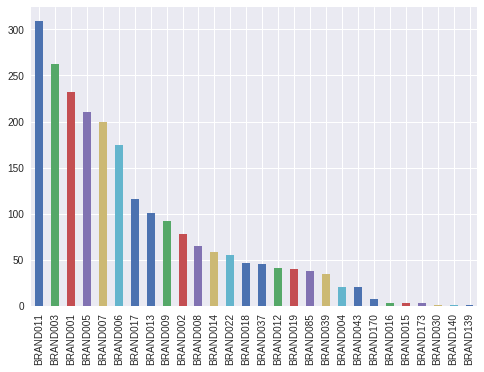

In [52]:
brandCat1=category1['Brand Code'].value_counts()
brandCat1.plot.bar()

### Now the results are a bit more visible. But looking at this I'm curious if these are the same brands who performed well in sales too.

### Let us go back to **pivot2** i.e sales data of the brands

## We will watch out for brands 11, 3, 1, 5, 7, and 6.

In [95]:
pivot2.head()

Brand Code,BRAND001,BRAND002,BRAND003,BRAND004,BRAND005,BRAND006,BRAND007,BRAND008,BRAND009,BRAND010,...,BRAND180,BRAND181,BRAND182,BRAND183,BRAND184,BRAND185,BRAND186,BRAND187,BRAND188,nan
Month,,,,,,,,,,,,,,,,,,,,,
1,11393.40,4406.71,10035.29,408.01,6549.25,3467.04,4327.84,989.01,1290.68,740.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9273.34,3717.02,6386.37,606.68,7373.25,3688.07,5175.63,634.95,1649.33,814.68,...,2.67,73.34,60.0,7.98,3.99,2.65,4.0,12.67,5.99,NaN
3,5440.70,3652.92,7877.34,504.01,5122.70,3489.37,4166.62,1000.48,1203.35,600.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6873.35,3330.36,7658.71,1608.02,3580.69,3378.70,4142.58,487.24,2316.00,256.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6694.70,3087.62,8298.71,953.34,3248.63,3117.36,7268.54,929.01,1726.00,332.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
brandSalesFiltered=brandSales[brandSales['Total Sales']>=5500] #uncomment for cleaner graph
brandSalesFiltered.head()

,Month,Brand Code,Total Sales
0,1,BRAND001,11393.40
2,1,BRAND003,10035.29
4,1,BRAND005,6549.25
10,1,BRAND011,7063.01
16,1,BRAND017,16053.87


In [88]:
brandSales.head()

,Month,Brand Code,Total Sales
0,1,BRAND001,11393.40
1,1,BRAND002,4406.71
2,1,BRAND003,10035.29
3,1,BRAND004,408.01
4,1,BRAND005,6549.25


Brand Code,BRAND001,BRAND003,BRAND005,BRAND007,BRAND011,BRAND017,BRAND018,BRAND027,BRAND034
Month,,,,,,,,,
1,11393.40,10035.29,6549.25,NaN,7063.01,16053.87,11546.51,NaN,5788.16
2,9273.34,6386.37,7373.25,NaN,6041.86,19347.94,10324.03,NaN,NaN
3,NaN,7877.34,NaN,NaN,5644.96,10126.57,7303.19,NaN,NaN
4,6873.35,7658.71,NaN,NaN,NaN,7261.27,6761.99,NaN,NaN
5,6694.70,8298.71,NaN,7268.54,6167.74,9760.50,6857.93,NaN,NaN


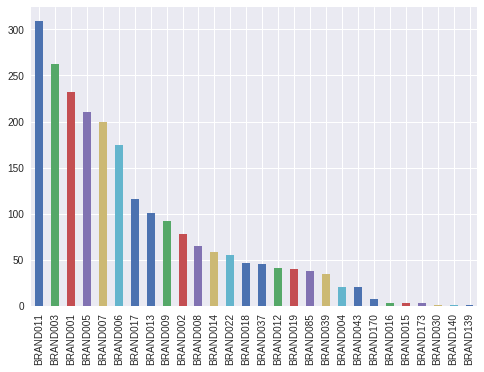

In [107]:
brandCat1=category1['Brand Code'].value_counts()
brandCat1.plot.bar()
brandSalesFiltered=brandSalesFiltered.pivot(index='Month',columns='Brand Code',values='Total Sales')
brandSalesFiltered.head()

### Thus it is evident that Mr. Wonderful sells the best selling brands under category 1 and that too at a high price. A similar analysis can be done for category 7 as well. 

## Let us see the average selling price of a few of these brands, 

In [0]:
spBrands=df.groupby(['Store Code','Brand Code'], as_index=False)['Sales Price'].mean()
# spBrands

## Let's pull some store data.

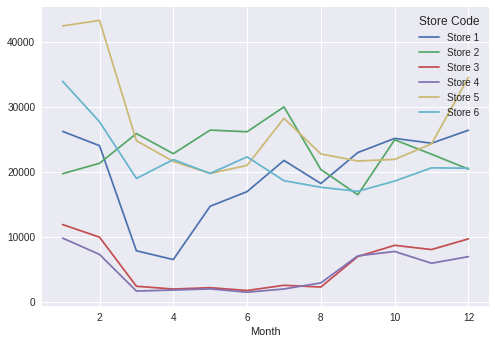

In [146]:
pivot1.plot()

### Brand sales of Mr. Wonderful.

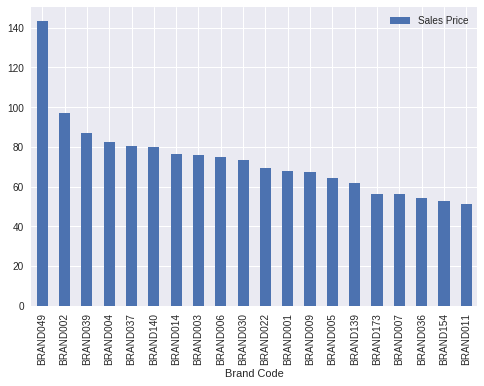

In [138]:
spBrands=spBrands[spBrands['Store Code']=='Store 5']
spBrands.sort_values(by='Sales Price',ascending=False)[:20].set_index('Brand Code').plot.bar()

### Brand sales of a similar performing store(Store 2, green).

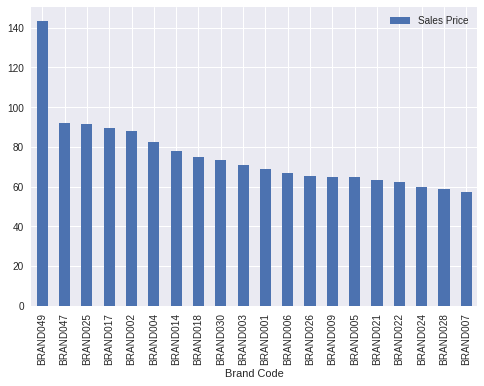

In [145]:
spBrands1=spBrands[spBrands['Store Code']=='Store 2']
spBrands1.sort_values(by='Sales Price',ascending=False)[:20].set_index('Brand Code').plot.bar()

### Now let us see the brand sales of a poor performing store and analyse which brands are making it poor (Store 3, red).

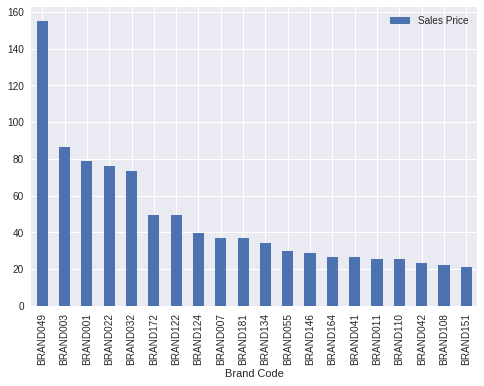

In [147]:
spBrands3=spBrands[spBrands['Store Code']=='Store 3']
spBrands3.sort_values(by='Sales Price',ascending=False)[:20].set_index('Brand Code').plot.bar()

## Seems like even though the sales price are similar for the good and the bad stores for brands they sell, some are making money and some aren't. More analysis can be done, but I think most of the previous analysis would be sufficent for a very good grasp of what the data is trying to convey.
.
.
.
.
.
.


# Clustering

### Preparing the relavant variables for clustering.

In [0]:
clusteringDF=pd.DataFrame()
clusteringDF['Brand Code']=brandQty[['Brand Code']]
clusteringDF['Sales Qty']=brandQty[['Sales Qty']]
clusteringDF['Discount']=brandDiscount[['Discount']]
clusteringDF['Total Sales']=brandSales[['Total Sales']]
clusteringDF1=clusteringDF.groupby(['Brand Code'],as_index=False)['Total Sales'].sum()
clusteringDF2=clusteringDF.groupby(['Brand Code'],as_index=False)['Sales Qty'].sum()
clusteringDF3=clusteringDF.groupby(['Brand Code'],as_index=False)['Discount'].sum()

In [148]:
clusteringDF3.head()

,Brand Code,Discount
0,BRAND001,-99.62
1,BRAND002,204.24
2,BRAND003,2736.50
3,BRAND004,146.67
4,BRAND005,15.99


In [0]:
cluster=pd.DataFrame()
cluster['qty']=clusteringDF2['Sales Qty']
cluster['sales']=clusteringDF1['Total Sales']
cluster['discount']=clusteringDF3['Discount']

In [149]:
cluster.head()

,qty,sales,discount
0,1330,90876.40,-99.62
1,473,42970.30,204.24
2,1156,83340.73,2736.50
3,114,6937.44,146.67
4,829,54314.48,15.99


## Now we can make some assumptions about the type of data and the number of clusters it may contain. It is a hit and trial method to find the relavant metrices. I have played around with a few to give an idea of how the behavior of the clustering changes.

In [0]:
from sklearn.cluster import KMeans
import numpy as np

## 3 Clusters

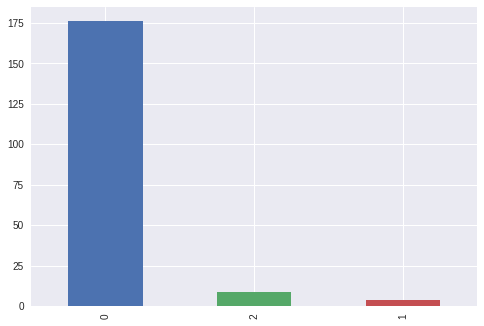

In [155]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(cluster[['qty','sales','discount']])
temp3=pd.Series(kmeans3.labels_)
temp3.value_counts().plot.bar()

## 5 clusters

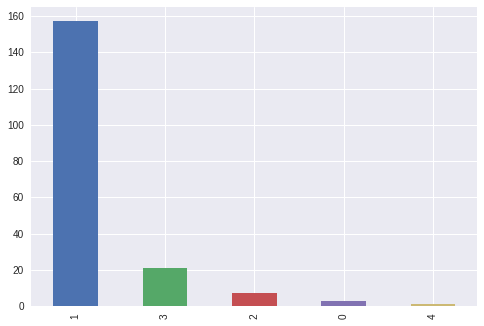

In [156]:
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(cluster[['qty','sales','discount']])
temp5=pd.Series(kmeans5.labels_)
temp5.value_counts().plot.bar()

## Let us try with sales and discount as metrices

## 3 clusters

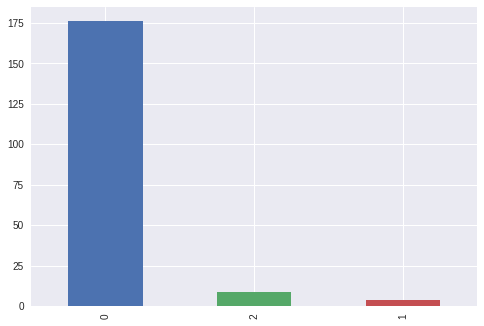

In [158]:
kmeans33 = KMeans(n_clusters=3, random_state=0).fit(cluster[['sales','discount']])
temp33=pd.Series(kmeans33.labels_)
temp33.value_counts().plot.bar()

## 10 clusters

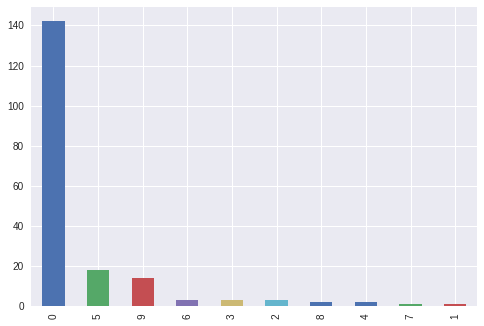

In [159]:
kmeans10 = KMeans(n_clusters=10, random_state=0).fit(cluster[['sales','discount']])
temp10=pd.Series(kmeans10.labels_)
temp10.value_counts().plot.bar()

# Given the preliminary analysis, I think the clustering would need a little more help from its metrices, and also some indepth thinking. Still, from the preceeding graphs it is evident that most of the brands follow a fixed pattern except a few outliers. 